In [1]:
import tensorflow as tf
print(tf.__version__)

C:\Users\Akshay\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Akshay\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Akshay\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Akshay\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: P

1.14.0


In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

In [3]:
url = 'https://raw.githubusercontent.com/ingledarshan/DL_dataset/master/moore.csv'
data = pd.read_csv(url, header=None).values

In [4]:
data[:5] #These are number of transistor present per year

array([[1971, 2300],
       [1972, 3500],
       [1973, 2500],
       [1973, 2500],
       [1974, 4100]], dtype=int64)

In [5]:
data[:,0].shape

(162,)

In [6]:
X = data[:,0].reshape(-1,1) # make it a 2D array of size N x D where D=1

In [7]:
X.shape

(162, 1)

In [8]:
Y=data[:,1]

In [9]:
Y.shape

(162,)

In [10]:
type(data)

numpy.ndarray

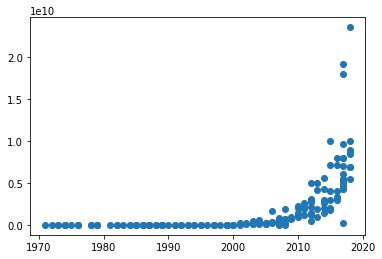

In [11]:
# Plot the data
plt.scatter(X,Y);
# It is exponential 

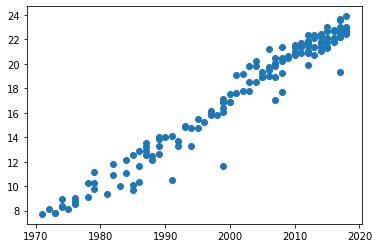

In [12]:
# We want a linear model, therefore lets take log
Y = np.log(Y)
plt.scatter(X,Y);

In [13]:
X = X-X.mean()

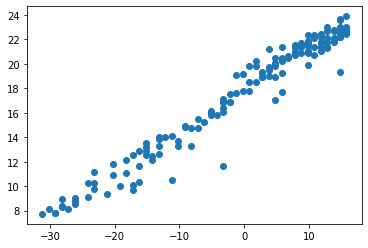

In [14]:
plt.scatter(X,Y);

In [15]:
# Since it is a regression problem, there is no activation function required.
# Therefore, in keras, we do use a Dense layer but we pass Activation=None or
# we can simply omit that arguments
# default: activation=None

In [16]:
# TF Model
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Input(shape=(1,)),
                                    tf.keras.layers.Dense(1)
])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [17]:
# Compile
# What optimizer?
# What loss function?
# 'adam' is the best what I have found
# On deep study, I have found over here that in this dataset, SGD optimizer works better.
# API of SGD:
# SGD(learning rate, momentum)

In [18]:
model.compile(optimizer=tf.keras.optimizers.SGD(0.001, 0.9), loss='mse')

**Observation:**

Initial LR performs v well, but later on it bcums too large by the end and therefore the cost becomes too high and the problem never converges.

What to do? To decrease the LR depending upon the epochs. This is called as 'LR Scheduling'.

In [19]:
# LR Scheduler
def schedule(epoch, lr):
  if epoch >= 50:
    return 0.0001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule) 

# Train the model
r = model.fit(X, Y, epochs=200, callbacks=[scheduler])

Epoch 1/200
162/162 [==============================] - 1s 5ms/sample - loss: 378.6498
Epoch 2/200
162/162 [==============================] - 0s 105us/sample - loss: 318.5511
Epoch 3/200
162/162 [==============================] - 0s 99us/sample - loss: 302.7226
Epoch 4/200
162/162 [==============================] - 0s 99us/sample - loss: 341.1118
Epoch 5/200
162/162 [==============================] - 0s 111us/sample - loss: 228.7634
Epoch 6/200
162/162 [==============================] - 0s 111us/sample - loss: 123.9463
Epoch 7/200
162/162 [==============================] - 0s 124us/sample - loss: 106.6564
Epoch 8/200
162/162 [==============================] - 0s 117us/sample - loss: 72.3478
Epoch 9/200
162/162 [==============================] - 0s 105us/sample - loss: 101.5705
Epoch 10/200
162/162 [==============================] - 0s 99us/sample - loss: 47.3946
Epoch 11/200
162/162 [==============================] - 0s 117us/sample - loss: 25.4098
Epoch 12/200
162/162 [================

162/162 [==============================] - 0s 105us/sample - loss: 0.8794
Epoch 96/200
162/162 [==============================] - 0s 99us/sample - loss: 0.8726
Epoch 97/200
162/162 [==============================] - 0s 111us/sample - loss: 0.8768
Epoch 98/200
162/162 [==============================] - 0s 105us/sample - loss: 0.8820
Epoch 99/200
162/162 [==============================] - 0s 105us/sample - loss: 0.8724
Epoch 100/200
162/162 [==============================] - 0s 105us/sample - loss: 0.8725
Epoch 101/200
162/162 [==============================] - 0s 86us/sample - loss: 0.8842
Epoch 102/200
162/162 [==============================] - 0s 117us/sample - loss: 0.8794
Epoch 103/200
162/162 [==============================] - 0s 99us/sample - loss: 0.8944
Epoch 104/200
162/162 [==============================] - 0s 99us/sample - loss: 0.8915
Epoch 105/200
162/162 [==============================] - 0s 105us/sample - loss: 0.8726
Epoch 106/200
162/162 [==============================]

162/162 [==============================] - 0s 80us/sample - loss: 0.8711
Epoch 189/200
162/162 [==============================] - 0s 74us/sample - loss: 0.8799
Epoch 190/200
162/162 [==============================] - 0s 68us/sample - loss: 0.8731
Epoch 191/200
162/162 [==============================] - 0s 99us/sample - loss: 0.8719
Epoch 192/200
162/162 [==============================] - 0s 99us/sample - loss: 0.8713
Epoch 193/200
162/162 [==============================] - 0s 105us/sample - loss: 0.8739
Epoch 194/200
162/162 [==============================] - 0s 80us/sample - loss: 0.8827
Epoch 195/200
162/162 [==============================] - 0s 93us/sample - loss: 0.8716
Epoch 196/200
162/162 [==============================] - 0s 86us/sample - loss: 0.8789
Epoch 197/200
162/162 [==============================] - 0s 80us/sample - loss: 0.8985
Epoch 198/200
162/162 [==============================] - 0s 86us/sample - loss: 0.8703
Epoch 199/200
162/162 [==============================] -

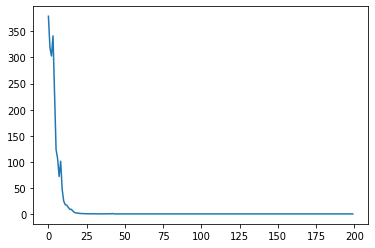

In [20]:
plt.plot(r.history['loss'], label='loss');

In [21]:
print(model.layers)
# Note there is only one layer. Input layer doesnt count

In [22]:
print(model.layers[0].get_weights())

[array([[0.3339682]], dtype=float32), array([17.75306], dtype=float32)]


In [23]:
# Slope of the line
a = model.layers[0].get_weights()[0][0,0]
a

0.3339682

In [24]:
print("Time to double:", np.log(2) / a)

Time to double: 2.0754886137673614


# Therefore, we have confirmed that the Moore's law is True as we see it has doubled.

In [25]:
# Demonstrate the analytical solution for Linear Regression
# This will confirm our above answer too
X = np.array(X).flatten()
Y = np.array(Y)

denominator = X.dot(X) - X.mean() * X.sum()

a = (X.dot(Y) - Y.mean() * X.sum()) / denominator
b = (Y.mean() * X.dot(X) - X.mean() * X.dot(Y)) / denominator

print(a,b)
print("Time to double:", np.log(2)/a)

0.34168248738731316 17.764939393631764
Time to double: 2.0286295205239195


# Since TF Dense layer has multiple outputs, it is going to return a 2D Matrix, whereas, we want a matrix of 1D length. therefore, we need to flatten the output so that Y hat has the same shape as Y.

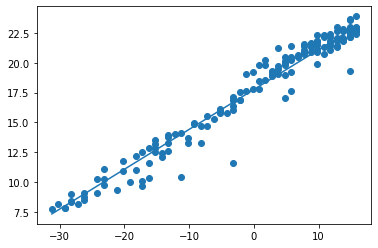

In [26]:
# Predictions
Ypred = model.predict(X).flatten()
plt.scatter(X,Y)
plt.plot(X, Ypred);

**Observation:**
Line passes through the data points. That once again confirms the Moore's law.

In [27]:
# Manual Calculation:
# Weights
w , b = model.layers[0].get_weights()

# Reshape X as we flattened it before
X = X.reshape(-1,1)

Ypred2 = (X.dot(w) + b).flatten()

np.allclose(Ypred , Ypred2)

True